**Задание**  
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
# Берём датасет с цветками ириса
iris = load_iris()

In [4]:
# Берём два признака - sepal_length и sepal_width и целевую переменную - variety
data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'p_len', 'p_wid'])[['sepal_length', 'sepal_width']]
data['variety'] = iris.target
data.head(3)

,sepal_length,sepal_width,variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0


In [5]:
# Делим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [6]:
# Выносим целевую переменную в отдельные выборки
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [7]:
# Строим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [8]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
print(f"Точность предсказания: {len(result[result[0] == result[1]])/30*100:.3}%")
print(f"Ошибки:\n {result[result[0] != result[1]]}")
# Точность предсказания по выбранным 2 столбцам не очень высокая - примерно от 70 до 90%
# Что не удивительно, учитываю невысокую корреляцию с классами - из описания датасета 0.7826 и -0.4194 соответственно
# Использование третьего столбца повысило бы точность примерно до 100%

Точность предсказания: 80.0%
Ошибки:
     0  1
0   0  1
10  2  1
11  1  2
15  2  1
16  2  1
22  2  1


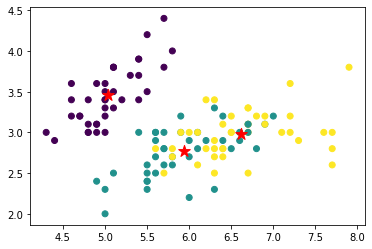

In [9]:
plt.scatter(data_train['sepal_length'], data_train['sepal_width'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()
# Вряд ли можно ожидать хорошего результата при такой картине

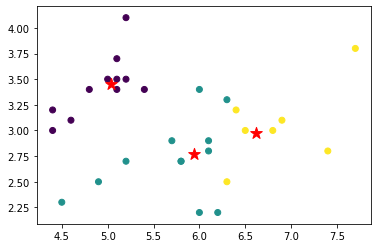

In [10]:
plt.scatter(data_test['sepal_length'], data_test['sepal_width'], c=lda.predict(data_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()
# Его и нет

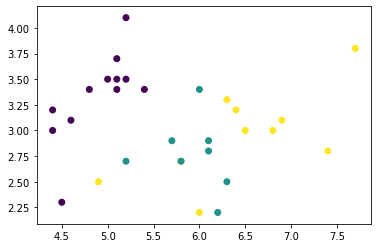

In [11]:
plt.scatter(data_test['sepal_length'], data_test['sepal_width'], c=y_test)
plt.show()
# Вот так должно было быть на тестовой выборке, но чудес не бывает...

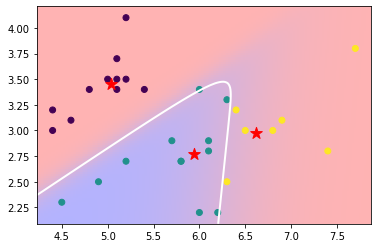

In [12]:
# Визиализируем предсказания для тестовой выборки и центры классов
plt.scatter(data_test['sepal_length'], data_test['sepal_width'], c=lda.predict(data_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [13]:
# Оставляем только два признака - sepal_length и sepal_width
data = data[['sepal_length', 'sepal_width']]
data.head(3)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [14]:
# Нормализуем
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

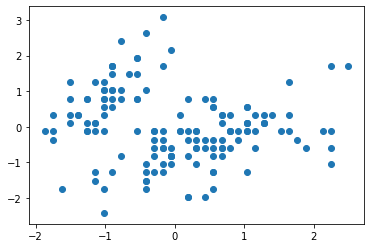

In [15]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])

In [16]:
from sklearn.cluster import KMeans

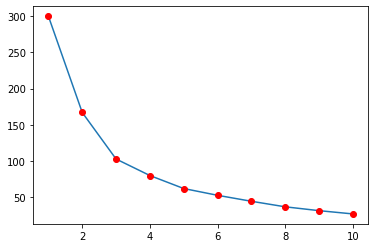

In [17]:
# Попытаемся подобрать оптимальное число кластеров для алгоритма kmean
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
# Излом графика визуально не так очевиден, но всё же скорее 3, 
# т.к. величина убывания все ещё заметно уменьшается после 3, а после 4 - нет

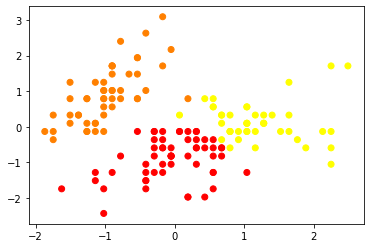

In [20]:
# Визиализируем полученную кластеризацию
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', c=clusters)